Diabetes data shape: (101766, 50)
IDs mapping shape: (67, 2)
Data warehouse created: hospital_dws.sqlite

Model Performance:
Accuracy: 0.887737054141692

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     18069
           1       0.00      0.00      0.00      2285

    accuracy                           0.89     20354
   macro avg       0.44      0.50      0.47     20354
weighted avg       0.79      0.89      0.83     20354


Confusion Matrix:
 [[18069     0]
 [ 2285     0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


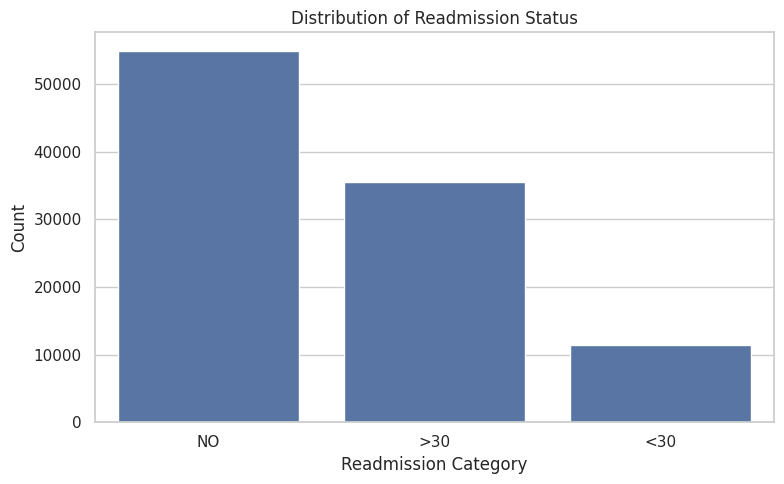

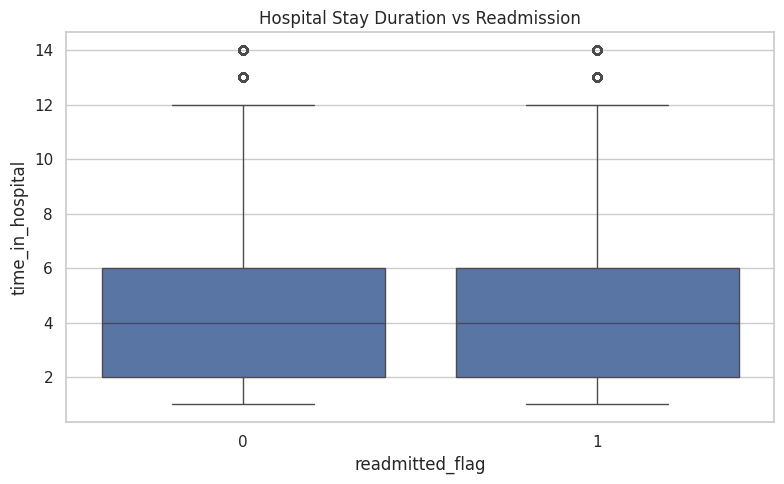

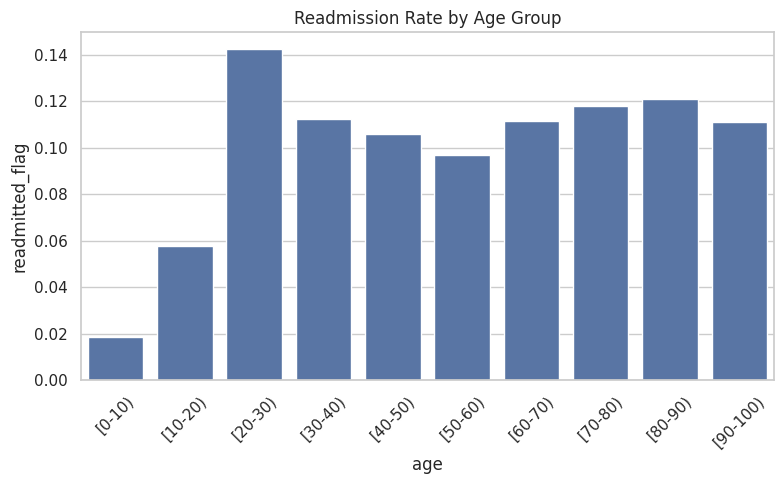


Top 10 most common diagnosis codes among readmitted patients:
diag_1
428       968
414       595
410       373
434       329
486       314
786       291
491       287
996       264
276       257
427       252
Name: count, dtype: int64


In [ ]:


import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


diabetes_df = pd.read_csv('/content/diabetic_data.csv')
ids_mapping = pd.read_csv('/content/IDS_mapping.csv')

print("Diabetes data shape:", diabetes_df.shape)
print("IDs mapping shape:", ids_mapping.shape)


diabetes_df = diabetes_df.replace('?', np.nan)


drop_cols = [col for col in diabetes_df.columns if diabetes_df[col].nunique() <= 1]
diabetes_df = diabetes_df.drop(columns=drop_cols)


diabetes_df = diabetes_df.dropna(subset=['encounter_id', 'patient_nbr'])


patients = diabetes_df[['patient_nbr', 'race', 'gender', 'age']].drop_duplicates()
admissions = diabetes_df[['encounter_id', 'patient_nbr', 'admission_type_id', 'discharge_disposition_id',
                          'admission_source_id', 'time_in_hospital', 'num_lab_procedures',
                          'num_procedures', 'num_medications', 'number_diagnoses',
                          'readmitted']]

diagnosis = diabetes_df[['encounter_id', 'diag_1', 'diag_2', 'diag_3']]


conn = sqlite3.connect('hospital_dws.sqlite')
patients.to_sql('patients', conn, if_exists='replace', index=False)
admissions.to_sql('admissions', conn, if_exists='replace', index=False)
diagnosis.to_sql('diagnosis', conn, if_exists='replace', index=False)
ids_mapping.to_sql('ids_mapping', conn, if_exists='replace', index=False)
conn.close()

print("Data warehouse created: hospital_dws.sqlite")


diabetes_df['readmitted_flag'] = diabetes_df['readmitted'].apply(
    lambda x: 1 if x in ['<30'] else 0
)


features = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_diagnoses']
X = diabetes_df[features]
y = diabetes_df['readmitted_flag']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\nModel Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


plt.figure(figsize=(8, 5))
sns.countplot(x='readmitted', data=diabetes_df)
plt.title('Distribution of Readmission Status')
plt.xlabel('Readmission Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x='readmitted_flag', y='time_in_hospital', data=diabetes_df)
plt.title('Hospital Stay Duration vs Readmission')
plt.tight_layout()
plt.show()


readmit_summary = diabetes_df.groupby('age')['readmitted_flag'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='age', y='readmitted_flag', data=readmit_summary)
plt.title('Readmission Rate by Age Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nTop 10 most common diagnosis codes among readmitted patients:")
print(diagnosis.loc[diabetes_df['readmitted_flag'] == 1, ['diag_1']].value_counts().head(10))


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8, 5)


print("Loading datasets...")
diabetes_df = pd.read_csv("/content/diabetic_data.csv")
ids_mapping = pd.read_csv("/content/IDS_mapping.csv")

print("Diabetes data shape:", diabetes_df.shape)
print("IDs mapping shape:", ids_mapping.shape)
print("\nPreview of main data:")
display(diabetes_df.head())


Loading datasets...
Diabetes data shape: (101766, 50)
IDs mapping shape: (67, 2)

Preview of main data:


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['encounter_id'].plot(kind='hist', bins=20, title='encounter_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['patient_nbr'].plot(kind='hist', bins=20, title='patient_nbr')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['admission_type_id'].plot(kind='hist', bins=20, title='admission_type_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('race').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('age').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('medical_specialty').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='index', y='encounter_id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='encounter_id', y='patient_nbr', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='patient_nbr', y='admission_type_id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='admission_type_id', y='discharge_disposition_id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['encounter_id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('race')):
  _plot_series(series, series_name, i)
  fig.legend(title='race', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('encounter_id')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['encounter_id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('gender')):
  _plot_series(series, series_name, i)
  fig.legend(title='gender', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('encounter_id')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['encounter_id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('age')):
  _plot_series(series, series_name, i)
  fig.legend(title='age', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('encounter_id')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['encounter_id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_15.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('medical_specialty')):
  _plot_series(series, series_name, i)
  fig.legend(title='medical_specialty', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('encounter_id')

from matplotlib import pyplot as plt
_df_16['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['encounter_id'].plot(kind='line', figsize=(8, 4), title='encounter_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['patient_nbr'].plot(kind='line', figsize=(8, 4), title='patient_nbr')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_19['admission_type_id'].plot(kind='line', figsize=(8, 4), title='admission_type_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['gender'].value_counts()
    for x_label, grp in _df_20.groupby('race')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('race')
_ = plt.ylabel('gender')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['age'].value_counts()
    for x_label, grp in _df_21.groupby('gender')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('gender')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['medical_specialty'].value_counts()
    for x_label, grp in _df_22.groupby('age')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('age')
_ = plt.ylabel('medical_specialty')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['diag_1'].value_counts()
    for x_label, grp in _df_23.groupby('medical_specialty')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('medical_specialty')
_ = plt.ylabel('diag_1')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['race'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='index', y='race', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_25['gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_25, x='index', y='gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_26['age'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_26, x='index', y='age', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_27['medical_specialty'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_27, x='index', y='medical_specialty', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)


Cleaning data...
Data after cleaning: (101766, 48)
Remaining columns: ['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']


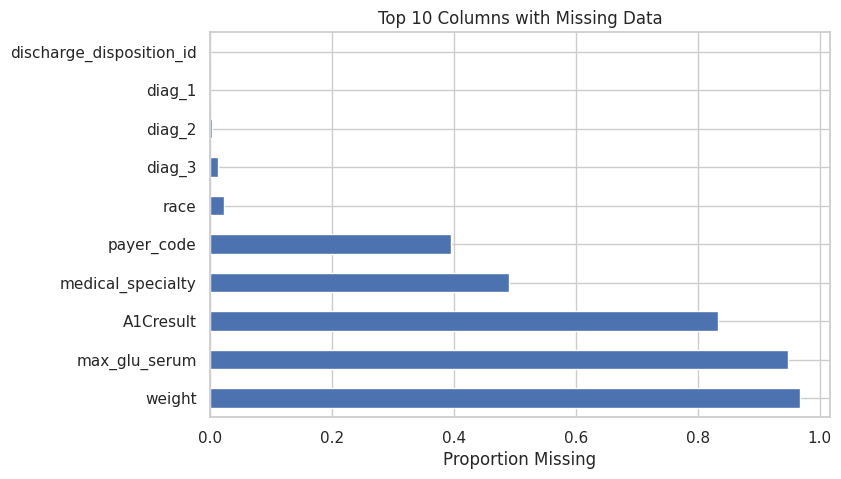

In [ ]:
print("\nCleaning data...")


diabetes_df = diabetes_df.replace('?', np.nan)


drop_cols = [col for col in diabetes_df.columns if diabetes_df[col].nunique() <= 1]
diabetes_df.drop(columns=drop_cols, inplace=True)


diabetes_df.dropna(subset=['encounter_id', 'patient_nbr'], inplace=True)


numeric_cols = ['time_in_hospital', 'num_lab_procedures', 'num_procedures',
                'num_medications', 'number_diagnoses']
for col in numeric_cols:
    diabetes_df[col] = pd.to_numeric(diabetes_df[col], errors='coerce')

print("Data after cleaning:", diabetes_df.shape)
print("Remaining columns:", diabetes_df.columns.tolist())


missing = diabetes_df.isnull().mean().sort_values(ascending=False).head(10)
missing.plot(kind='barh', title='Top 10 Columns with Missing Data')
plt.xlabel('Proportion Missing')
plt.show()


In [ ]:
print("\nCreating SQLite data warehouse...")

patients = diabetes_df[['patient_nbr', 'race', 'gender', 'age']].drop_duplicates()
admissions = diabetes_df[['encounter_id', 'patient_nbr', 'admission_type_id',
                          'discharge_disposition_id', 'admission_source_id',
                          'time_in_hospital', 'num_lab_procedures',
                          'num_procedures', 'num_medications',
                          'number_diagnoses', 'readmitted']]
diagnosis = diabetes_df[['encounter_id', 'diag_1', 'diag_2', 'diag_3']]

conn = sqlite3.connect('hospital_dws.sqlite')
patients.to_sql('patients', conn, if_exists='replace', index=False)
admissions.to_sql('admissions', conn, if_exists='replace', index=False)
diagnosis.to_sql('diagnosis', conn, if_exists='replace', index=False)
ids_mapping.to_sql('ids_mapping', conn, if_exists='replace', index=False)
conn.close()

print("✅ Data warehouse created as 'hospital_dws.sqlite'")



Creating SQLite data warehouse...
✅ Data warehouse created as 'hospital_dws.sqlite'


In [ ]:
import sqlite3
import pandas as pd


conn = sqlite3.connect('/content/hospital_dws.sqlite')


tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("Tables in Database:\n", tables)


df_sample = pd.read_sql_query("SELECT * FROM admissions LIMIT 10;", conn)
print("\nSample Records from admissions:\n", df_sample.head())


df_mapping = pd.read_sql_query("SELECT * FROM IDS_mapping LIMIT 10;", conn)
print("\nSample Records from IDS_mapping:\n", df_mapping.head())


for table in tables['name']:
    count = pd.read_sql_query(f"SELECT COUNT(*) as total FROM {table};", conn)
    print(f"\nTotal rows in {table}: {count['total'][0]}")


conn.close()

Tables in Database:
           name
0     patients
1   admissions
2    diagnosis
3  ids_mapping

Sample Records from admissions:
    encounter_id  patient_nbr  admission_type_id  discharge_disposition_id  \
0       2278392      8222157                  6                        25   
1        149190     55629189                  1                         1   
2         64410     86047875                  1                         1   
3        500364     82442376                  1                         1   
4         16680     42519267                  1                         1   

   admission_source_id  time_in_hospital  num_lab_procedures  num_procedures  \
0                    1                 1                  41               0   
1                    7                 3                  59               0   
2                    7                 2                  11               5   
3                    7                 2                  44               1   
4      

Data loaded successfully!

Patients shape: (73326, 4)
Admissions shape: (101766, 11)
Diagnosis shape: (101766, 4)
Mapping shape: (67, 2)

Merged Dataset Shape: (322869, 18)

Columns:
 ['encounter_id', 'patient_nbr', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_diagnoses', 'readmitted', 'race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3', 'description']


/tmp/ipython-input-123644063.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='gender', palette='Set2')


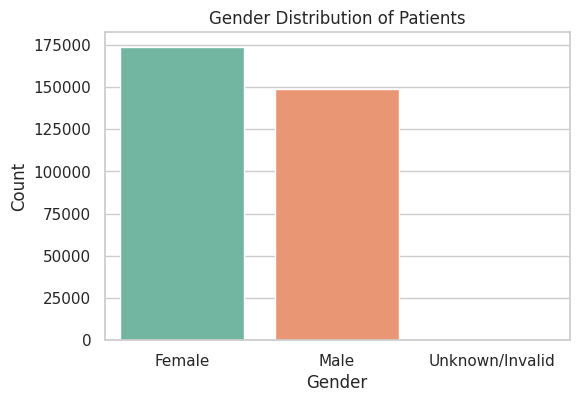

/tmp/ipython-input-123644063.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='age', order=sorted(df['age'].unique()), palette='coolwarm')


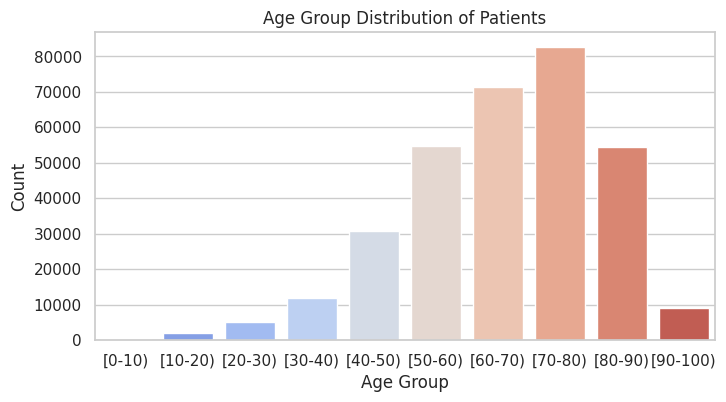

/tmp/ipython-input-123644063.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='readmitted', palette='muted')


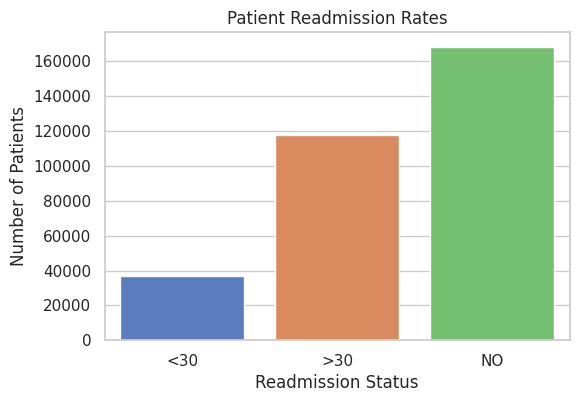

/tmp/ipython-input-123644063.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='description', order=df['description'].value_counts().index, palette='pastel')


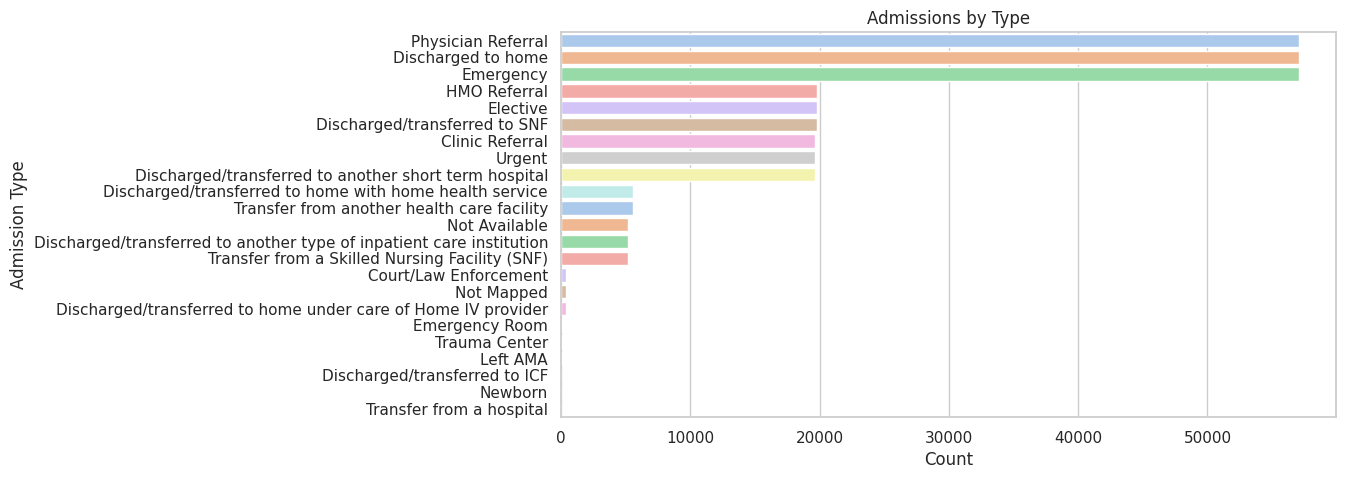

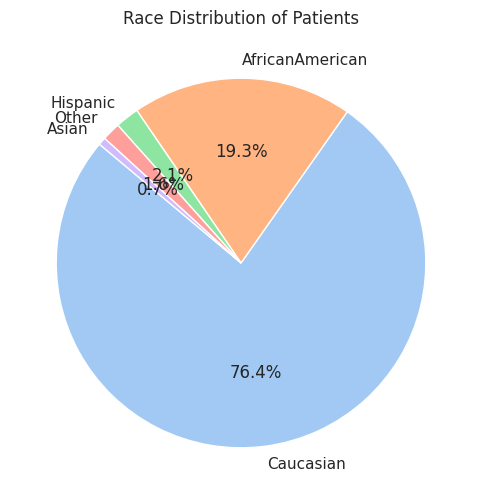

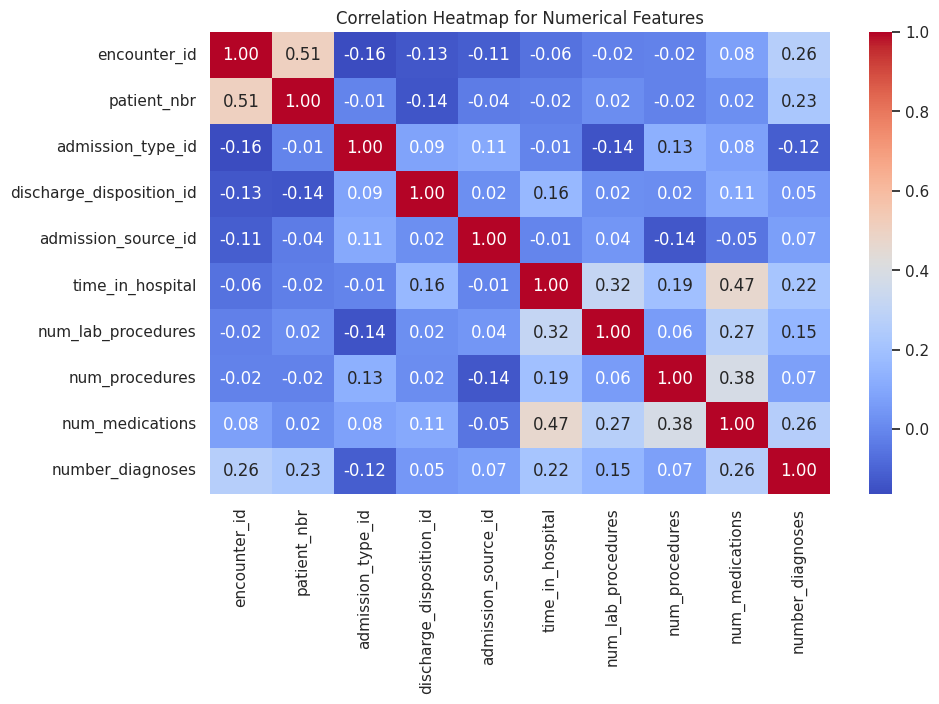

In [ ]:


import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


conn = sqlite3.connect('/content/hospital_dws.sqlite')


patients_df = pd.read_sql_query("SELECT * FROM patients;", conn)
admissions_df = pd.read_sql_query("SELECT * FROM admissions;", conn)
diagnosis_df = pd.read_sql_query("SELECT * FROM diagnosis;", conn)
ids_mapping_df = pd.read_sql_query("SELECT * FROM ids_mapping;", conn)
conn.close()

print("Data loaded successfully!")
print("\nPatients shape:", patients_df.shape)
print("Admissions shape:", admissions_df.shape)
print("Diagnosis shape:", diagnosis_df.shape)
print("Mapping shape:", ids_mapping_df.shape)


ids_mapping_df['admission_type_id'] = pd.to_numeric(ids_mapping_df['admission_type_id'], errors='coerce').astype('Int64')
admissions_df['admission_type_id'] = pd.to_numeric(admissions_df['admission_type_id'], errors='coerce').astype('Int64')



df = pd.merge(admissions_df, patients_df, on="patient_nbr", how="left")
df = pd.merge(df, diagnosis_df, on="encounter_id", how="left")
df = pd.merge(df, ids_mapping_df, on="admission_type_id", how="left")


print("\nMerged Dataset Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())


for col in ['gender', 'race', 'age', 'readmitted', 'description']:
    if col in df.columns:
        df[col] = df[col].astype('category')

if 'gender' in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x='gender', palette='Set2')
    plt.title('Gender Distribution of Patients')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.show()


if 'age' in df.columns:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x='age', order=sorted(df['age'].unique()), palette='coolwarm')
    plt.title('Age Group Distribution of Patients')
    plt.xlabel('Age Group')
    plt.ylabel('Count')
    plt.show()


if 'readmitted' in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x='readmitted', palette='muted')
    plt.title('Patient Readmission Rates')
    plt.xlabel('Readmission Status')
    plt.ylabel('Number of Patients')
    plt.show()


if 'description' in df.columns:
    plt.figure(figsize=(10,5))
    sns.countplot(data=df, y='description', order=df['description'].value_counts().index, palette='pastel')
    plt.title('Admissions by Type')
    plt.xlabel('Count')
    plt.ylabel('Admission Type')
    plt.show()


if 'race' in df.columns:
    plt.figure(figsize=(6,6))
    df['race'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
    plt.title('Race Distribution of Patients')
    plt.ylabel('')
    plt.show()


numeric_df = df.select_dtypes(include=['int64', 'float64'])
if not numeric_df.empty:
    plt.figure(figsize=(10,6))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap for Numerical Features')
    plt.show()
else:
    print("\nNo numeric columns available for correlation heatmap.")

Merged Dataset Shape: (322869, 15)
   encounter_id  patient_nbr  admission_type_id  discharge_disposition_id  \
0       2278392      8222157                  6                        25   
1       2278392      8222157                  6                        25   
2       2278392      8222157                  6                        25   
3        149190     55629189                  1                         1   
4        149190     55629189                  1                         1   

   admission_source_id  time_in_hospital  num_lab_procedures  num_procedures  \
0                    1                 1                  41               0   
1                    1                 1                  41               0   
2                    1                 1                  41               0   
3                    7                 3                  59               0   
4                    7                 3                  59               0   

   num_medications  n

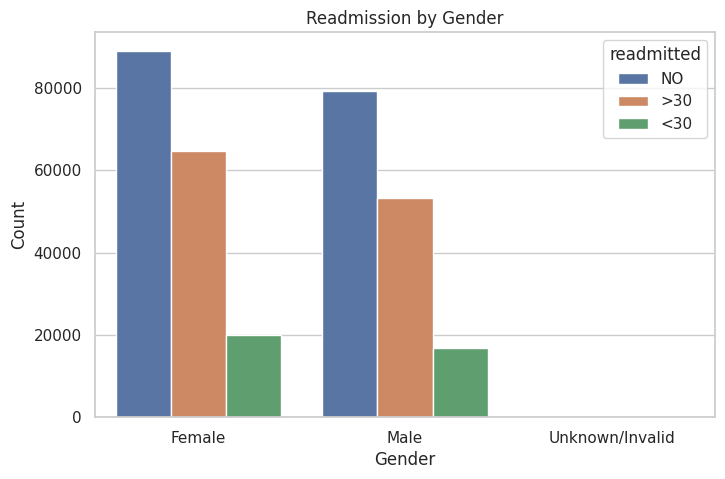

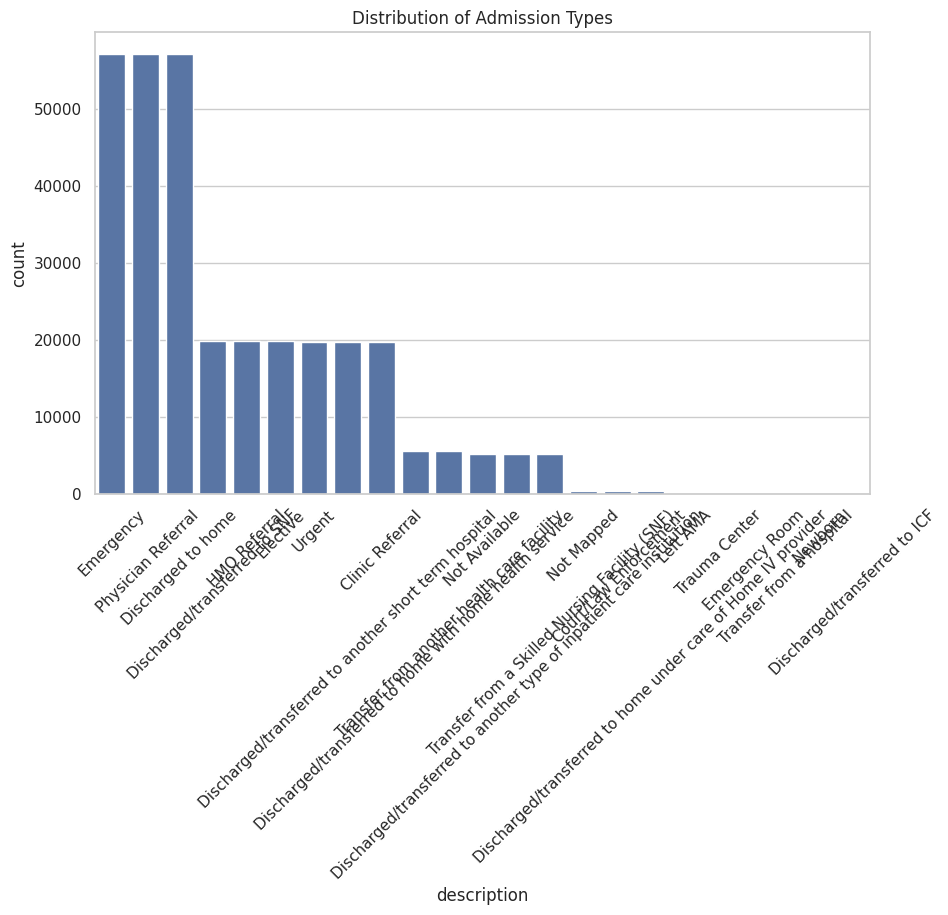

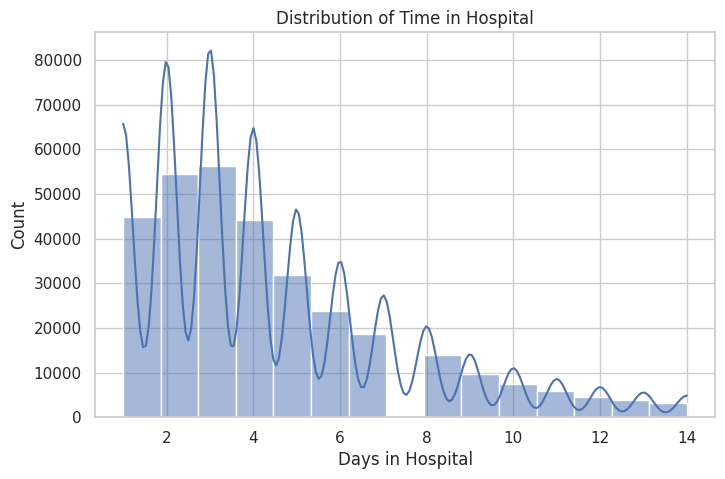

In [ ]:


import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns


conn = sqlite3.connect('/content/hospital_dws.sqlite')


patients_df = pd.read_sql('SELECT * FROM patients', conn)
admissions_df = pd.read_sql('SELECT * FROM admissions', conn)
diagnosis_df = pd.read_sql('SELECT * FROM diagnosis', conn)
ids_mapping_df = pd.read_sql('SELECT * FROM ids_mapping', conn)


ids_mapping_df['admission_type_id'] = pd.to_numeric(ids_mapping_df['admission_type_id'], errors='coerce')


merged_df = admissions_df.merge(ids_mapping_df, on='admission_type_id', how='left')


final_df = merged_df.merge(patients_df, on='patient_nbr', how='left')


print("Merged Dataset Shape:", final_df.shape)
print(final_df.head())



plt.figure(figsize=(8, 5))
sns.countplot(data=final_df, x='gender', hue='readmitted')
plt.title("Readmission by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=final_df, x='description', order=final_df['description'].value_counts().index)
plt.title("Distribution of Admission Types")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(final_df['time_in_hospital'], bins=15, kde=True)
plt.title("Distribution of Time in Hospital")
plt.xlabel("Days in Hospital")
plt.show()


conn.close()


In [ ]:


from graphviz import Digraph


dot = Digraph(comment='Hospital Data Processing Flow', format='png')
dot.attr(rankdir='TB', size='8,6', bgcolor='white', style='filled', color='lightgrey')


dot.node('A', 'diabetic_data.csv', shape='box', style='filled', color='lightblue')
dot.node('B', 'IDS_mapping.csv', shape='box', style='filled', color='lightgreen')
dot.node('C', 'hospital_dws.sqlite', shape='box', style='filled', color='lightyellow')

dot.node('D', 'patients', shape='ellipse', color='orange')
dot.node('E', 'admissions', shape='ellipse', color='orange')
dot.node('F', 'diagnosis', shape='ellipse', color='orange')
dot.node('G', 'ids_mapping', shape='ellipse', color='orange')

dot.node('H', 'Merge: admissions + ids_mapping', shape='diamond', color='lightcoral')
dot.node('I', 'Merge: with patients', shape='diamond', color='lightcoral')
dot.node('J', 'Final Dataset', shape='box', color='gold')
dot.node('K', 'Visual Analysis\n(Countplots, Histplots)', shape='parallelogram', color='lightcyan')


dot.edges(['AD', 'AE', 'AF'])
dot.edge('B', 'G', label='Mapping IDs')
dot.edge('E', 'H')
dot.edge('G', 'H')
dot.edge('H', 'I')
dot.edge('D', 'I')
dot.edge('I', 'J')
dot.edge('J', 'K')


dot.render('/content/data_flow_tree', view=True)
print("Data flow tree generated and saved as 'data_flow_tree.png'")


Data flow tree generated and saved as 'data_flow_tree.png'
